# **오토인코더의 작업 과정**

오토인코더의 주요 목적은 원본 데이터를 효과적으로 압축하면서, 원본 데이터를 가능한 한 잘 복원할 수 있는 낮은 차원의 표현(D)를 학습 하는 것이다. (ex:문장축소를 통해 중요한 문장 출력)

기본아이디어 : '고차원 데이터에서 저차원 표현을 학습하는 것’

In [ ]:
##필요한 라이브러리 가져오기
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
init_notebook_mode(connected=True)

## 무작위 데이터 생성
N = 50
random_x = np.linspace(2, 10, N)
random_y1 = np.linspace(2, 10, N)
random_y2 = np.linspace(2, 10, N)

##두 개의 산점도(추적) 생성
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers", name="Actual Data")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines", name="Model")

##플롯트(Plot)의 레이아웃 정의
layout = go.Layout(title="2D Data Repersentation Space", xaxis=dict(title="x2", range=(0,12)),
                   yaxis=dict(title="x1", range=(0,12)), height=400,
                   annotations=[dict(x=5, y=5, xref='x', yref='y', text='This 1D line is the Data Manifold (where data resides)',
                   showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                   ax=-120, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8)])
figure = go.Figure(data = [trace1], layout = layout)
iplot(figure)

In [ ]:
## 첫번째 그래프 세트
## 무작위 데이터 생성
random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1

## 네 개의 산점도(추적)를 생성
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")

##그래프의 레이아웃을 정의
layout = go.Layout(xaxis=dict(title="x1", range=(0,12)), yaxis=dict(title="x2", range=(0,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2,
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8),
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40),
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="2D Data Repersentation Space", showlegend=False)

data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)


#################
## 두번째 그래프 세트
## 무작위 데이터 생성
random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1

## 네 개의 산점도(추적)를 생성
trace4 = go.Scatter(x = random_x[4:24], y = random_y4[4:300], mode="lines")
trace3 = go.Scatter(x = random_x, y = random_y3, mode="lines")
trace1 = go.Scatter(x = random_x, y = random_y1, mode="markers")
trace2 = go.Scatter(x = random_x, y = random_y2, mode="lines")

##그래프의 레이아웃을 정의
layout = go.Layout(xaxis=dict(title="u1", range=(1.5,12)), yaxis=dict(title="u2", range=(1.5,12)), height=400,
                   annotations=[dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2,
                                     arrowcolor='#636363', ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8),
                                dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
                                     ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor='yellow', opacity=0.8), dict(
                                     x=4, y=5, xref='x', yref='y',text='d', ay=-40),
                                dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)], title="Latent Distance View Space", showlegend=False)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data = data, layout = layout)
iplot(figure)

** 다른 데이터, 다른 규칙**

- EX:  PCS(주성분분석)
- 주성분 분석(PCA)와 같은 차원 축소 기법을 사용하여 데이터를 투영할 때, 원래의 고차원 데이터에 포함된 분산의 일부만을 캡처하는 주성분을 선택하게 된다. 이 경우, 선택되지 않은 주성분에 해당하는 정보는 손실되므로, 투영된 데이터는 원래의 데이터를 완전히 복구할 수 없게 된다.

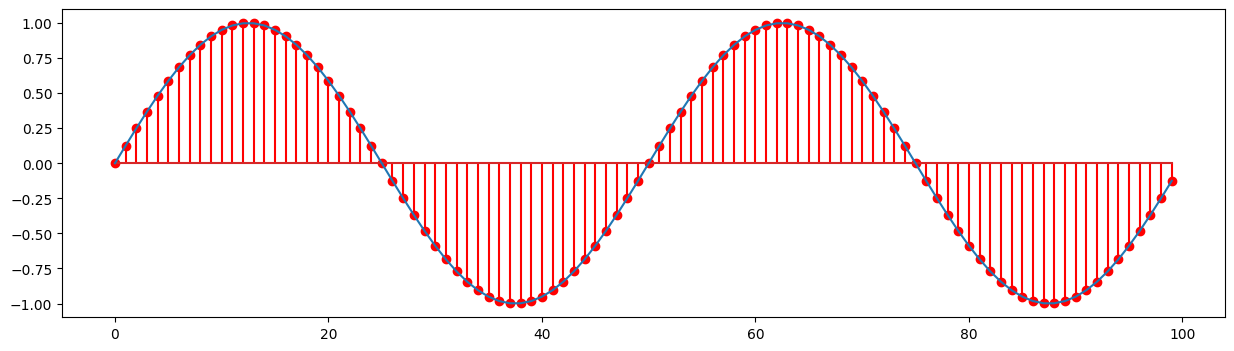

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fs = 100 # 샘플률(sample rate)를 100으로 설정한다. 즉, 1초 동안 100개의 데이터 포인트(데이터 위치)를 샘플링한다.
f = 2 # 신호의 주파수를 2Hz로 설정, 1초에 2번의 주기를 가지는 사인 웨이브를 생성
x = np.arange(fs) # \0부터 fs-1까지의 정수 배열을 생성해서 x축의 값들로 사용
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]
 #2*np.pi*f는 사인 함수의 주기를 조절,
 # (i/fs)는 각 샘플 포인트를 시간 단위로 변환.
 # 결과적으로 이 식은 주파수 f의 사인 웨이브를 생성
%matplotlib inline
plt.figure(figsize=(15,4))
plt.stem(x,y, 'r', );
plt.plot(x,y);

- 데이터의 차원을 축소하거나 데이터를 다른 공간으로 투영할 때 항상 정보의 손실이 발생할 수 있다.
- 원본 데이터의 모든 정보를 완전히 유지하면서 차원을 줄이는 것은 불가능하다.
- 예를 들어, 3차원의 데이터를 2차원 평면으로 투영하면, 그 투영된 데이터만으로는 원래 3차원의 위치를 완벽히 알아낼 수 없다.
    - (데이터를 다른 공간으로 투영한다"는 말은 데이터를 원래의 차원 또는 표현에서 다른 차원 또는 표현으로 변환한다는 의미)
        - 3D 객체의 그림자는 2D 평면에 표시됩니다. 이렇게 3D 객체의 정보를 2D로 표현하는 것을 '투영’)
- 같은 방식으로, 데이터를 압축하거나 인코딩할 때도 정보의 일부가 손실될 수 있다.
- 이러한 정보 손실은 차원축소나 데이터 압축과 같은 기술을 사용할 때 항상 고려해야 하는 중요한 문제점이다.
- 따라서 어떤 방법을 사용하든지, 그 방법의 장단점과 그로 인한 정보 손실에 대해 충분히 이해하고 있어야 한다.

# **오토인코더(AutoEncoder) 실행**

# UseCase 1 : Image Reconstruction

In [ ]:
##필요한 라이브러리 가져오기
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**데이터 전처리**


CSV 데이터셋을 읽어온 후 특성과 레이블을 분리하고 특성을 정규화한 다음,

데이터를 훈련 및 검증 데이터로 분할하고 입력 데이터를 기계 학습 모델에서 사용할 수 있도록 준비하는 과정을 수행

In [ ]:
### 데이터셋
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv')

## 예측 변수와 타깃 분리
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## 예측 변수 정규화(예측 변수의 값을 255로 나누어 정규화, 이미지 데이터의 픽셀 값을 [0, 1] 범위로 스케일링)
train_x = train_x / 255

## 훈련 및 검증 데이터셋 생성
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)
##train_test_split 함수를 사용, 훈련데이터 80%, 검증데이터 20%

## 입력 데이터 재구성
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)
##  784는 일반적으로 28x28 픽셀 이미지에 사용
## -1은 해당 차원의 크기가 데이터 크기를 기반으로 자동으로 결정


**오토인코더 구조 만들기**

3개 레이어로 구성 (2000, 1200, 500 노드)

인코딩 구조는 잠재 공간에 10개의 노드로 연결되고, 이 10개는 다시 각각 500, 1200, 2000개의 노드로 구성된 3개의 디코딩 구조로 연결

 Keras를 사용하여 인코더-디코더 구조의 오토인코더(Autoencoder) 신경망 모델을 정의

In [ ]:
## Input 레이어 정의
input_layer = Input(shape=(784,))

## 인코딩 아키텍처 정의 :500, 1000, 500개의 뉴런으로 구성된 완전 연결(Dense) 레이어
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)
### 각 레이어의 활성화 함수는 ReLU(Rectified Linear Unit)로 설정
### 이는 비선형성을 도입하고, 모델이 비선형 데이터 패턴을 학습

# 잠재공간(Latent View) 레이어 정의
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)
## 10개의 뉴런을 가진 완전 연결 레이어로 정의
## Sigmoid 함수가 사용

## 디코딩 아키텍처 정의 : 각각 500, 1000, 1500개의 뉴런으로 구성된 완전 연결 레이어
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output_layer 정의
output_layer  = Dense(784)(decode_layer3)

##전체 모델 구성 : 입력 레이어와 출력 레이어를 사용하여 전체 오토인코더 모델 생성
model = Model(input_layer, output_layer)

In [ ]:
##모델확인
model.summary()

##이 모델을 훈련시켜 입력 데이터의 압축된 표현을 학습하고,
##이를 사용하여 데이터 복원 및 다양한 응용 프로그램을 위해 사용

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 1500)              1177500   
                                                                 
 dense_1 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_2 (Dense)             (None, 500)               500500    
                                                                 
 dense_3 (Dense)             (None, 10)                5010      
                                                                 
 dense_4 (Dense)             (None, 500)               5500      
                                                                 
 dense_5 (Dense)             (None, 1000)              501000

**초기학습종료를 이용하여 훈련**

In [ ]:
#(오토인코더 모델을 컴파인하고 훈련하는 부분)

##오토인코더 모델을 컴파일
model.compile(optimizer='adam', loss='mse')
##옵티마이저로 'Adam'을 사용하는데 Adam은 경사 하강법 알고리즘의 변형 중 하나로,
##모델을 효과적으로 최적화하는 데 사용
##손실 함수로 'Mean Squared Error' (평균 제곱 오차)를 사용
##모델의 출력과 원래 입력 간의 평균 제곱 차이를 최소화

##조기 중지(Early Stopping) 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
##검증 데이터의 손실 값을 모니터링하고, 이 손실이 줄어들다가 증가하기 시작하면 훈련을 중지
##검증 손실이 개선되지 않는 에포크 수가 10으로 설정되어 있으므로,
##10 에포크 동안 손실이 향상되지 않으면 훈련이 중지

##모델 훈련
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

##입력과 출력이 동일한 데이터인 경우, 모델을 자기자신에게 학습시키는 오토인코더의 특성을 활용
##전체 데이터셋을 20번 반복하여 훈련, 미니 배치 크기는 2048로 설정
##검증 데이터는 val_x로 설정하고, 훈련 중 모델의 성능을 평가
##검증 손실이 향상되지 않으면 훈련이 중지

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 0.1614 - val_loss: 0.1197
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.0960 - val_loss: 0.0909
Epoch 3/20
4/4 [==============================] - 5s 1s/step - loss: 0.0881 - val_loss: 0.0817
Epoch 4/20
4/4 [==============================] - 6s 2s/step - loss: 0.0790 - val_loss: 0.0743
Epoch 5/20
4/4 [==============================] - 5s 1s/step - loss: 0.0742 - val_loss: 0.0726
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.0721 - val_loss: 0.0708
Epoch 7/20
4/4 [==============================] - 7s 2s/step - loss: 0.0698 - val_loss: 0.0681
Epoch 8/20
4/4 [==============================] - 5s 1s/step - loss: 0.0676 - val_loss: 0.0665
Epoch 9/20
4/4 [==============================] - 5s 1s/step - loss: 0.0660 - val_loss: 0.0641
Epoch 10/20
4/4 [==============================] - 6s 1s/step - loss: 0.0641 - val_loss: 0.0625
Epoch 11/20
4/4 [==============================] 

**검증 데이터에 예측을 생성**

In [ ]:
preds = model.predict(val_x)

63/63 [==============================] - 1s 15ms/step


**원본 이미지와 예측 이미지를 그리기**

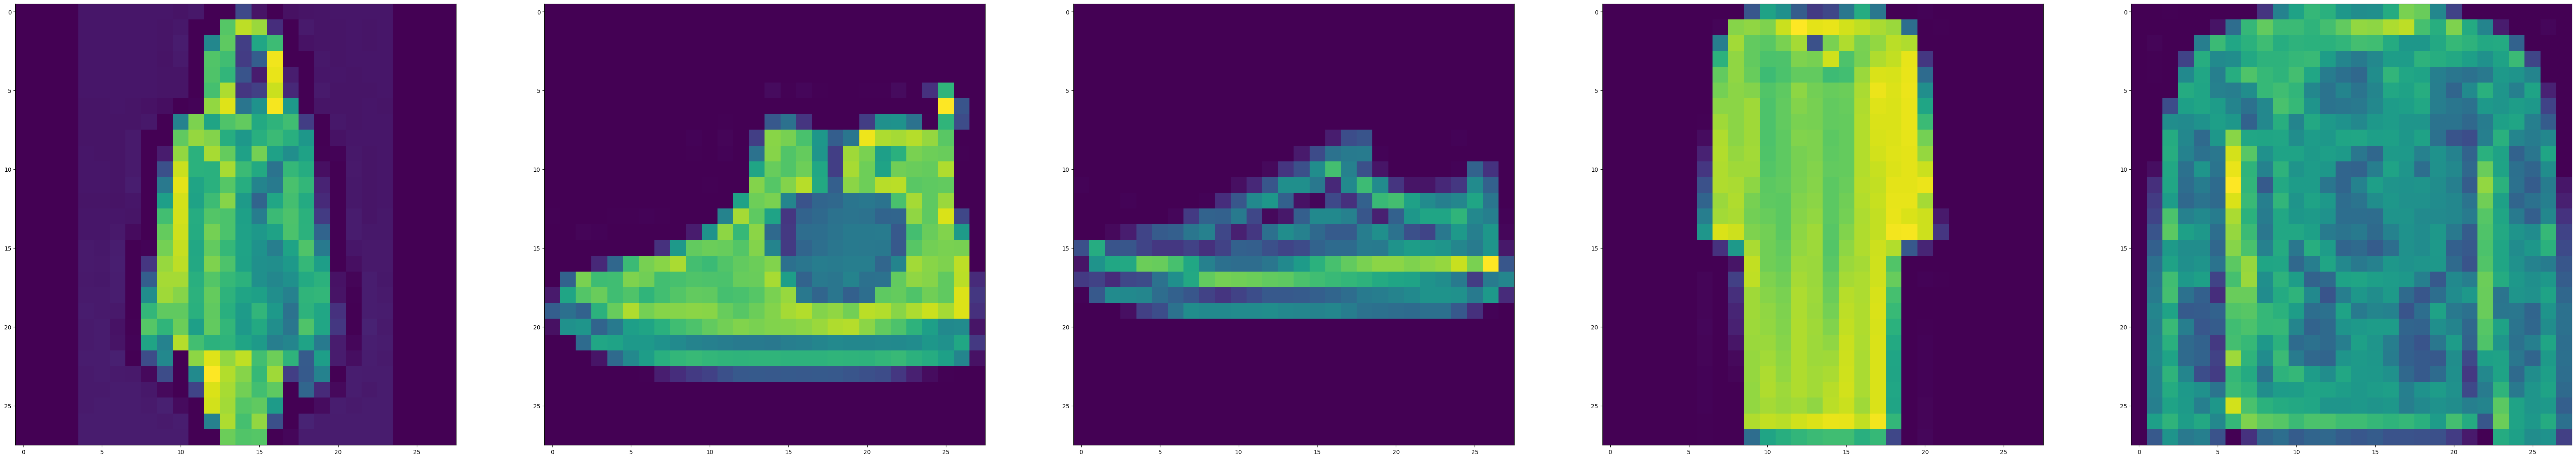

In [ ]:
##원본 이미지
##이미지 데이터를 시각적으로 검토하고, 모델의 입력 또는 출력 이미지를 확인

from PIL import Image
f, ax = plt.subplots(1,5) ##1x5 그리드 형태로 5개의 서브플롯(서브 그래프)을 생성
f.set_size_inches(80, 40) ##그림(플롯)의 크기를 설정, 가로 80 단위, 세로 40 단위
for i in range(5): ## 0부터 4까지의 숫자를 반복
    ax[i].imshow(val_x[i].reshape(28, 28))

##각 서브플롯(ax[i])에 이미지를 표시합니다. val_x[i]는 검증 데이터의 i번째 이미지를 나타내며,
## .reshape(28, 28)를 사용하여 이미지를 28x28 크기로 변형

plt.show()

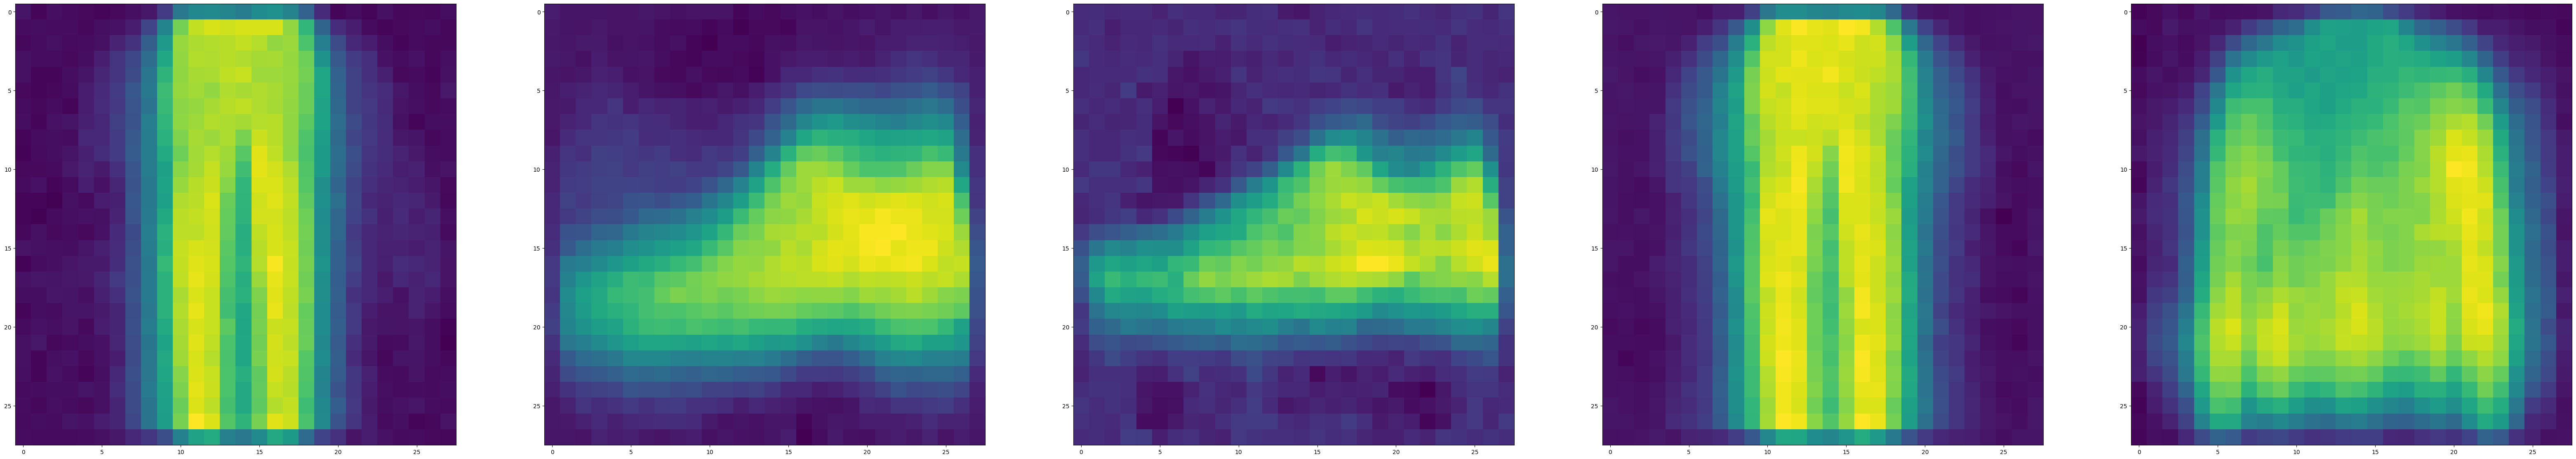

In [ ]:
## 예측 이미지
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()
## 20 epochs 만으로 입력 이미지를 다시 잘 구성하는 것을 확인

# UseCase 2 - Image Denoising

In [ ]:
# 노이즈제거
## 데이터셋 생성
##recreate the train_x array and val_x array
train_x = train[list(train.columns)[1:]].values

## 데이터를 훈련 및 검증 데이터로 다시 나누기
train_x, val_x = train_test_split(train_x, test_size=0.2)
##이터의 80%가 훈련 데이터(train_x)로 할당되고, 나머지 20%가 검증 데이터(val_x)로 할당

## 데이터 정규화(255로 나누면 0에서 255 범위의 값을 0에서 1 범위로 변환)
train_x = train_x/255.
val_x = val_x/255.

 convolutional layer을 추가하기 위해서, 28 * 28 matrix로 reshape

In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

**Noisy Images**

의도적으로 이미지에 노이즈를 추가도 가능함

이미지를 보완하는 imaug 패키지를 이용하여, 반대로 이미지에 노이즈 생성도 가능함

노이즈 종류

Salt and Pepper Noise

Gaussian Noise

Periodic Noise

Speckle Noise


impulse noise라고 불리는 Salt and Pepper Noise를 사용
 이 노이즈는 선명하고 갑작스러운 노이즈를 생성
 희소하게 검정/흰 픽셀을 생성

In [ ]:
## Salt and Pepper 노이즈 생성:
noise = augmenters.SaltAndPepper(0.1)
##. 0.1은 잡음의 강도 또는 비율을 나타내며, 여기서는 10%의 픽셀에 노이즈가 추가

##데이터 증강(augmentation) 시퀀스를 정의
seq_object = augmenters.Sequential([noise])

##훈련 및 검증 데이터에 노이즈 적용
train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255


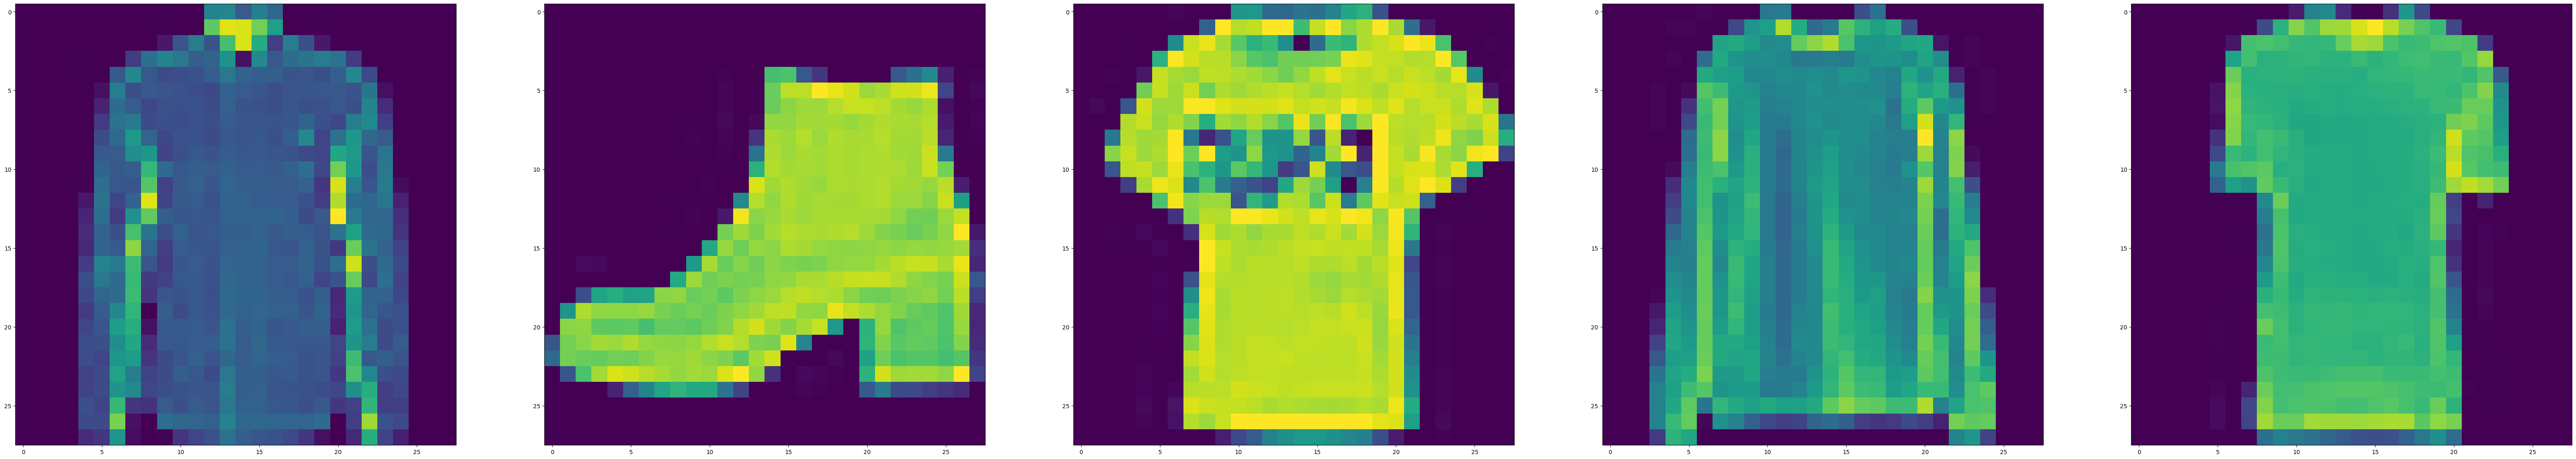

In [ ]:
## 노이즈 생성전
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

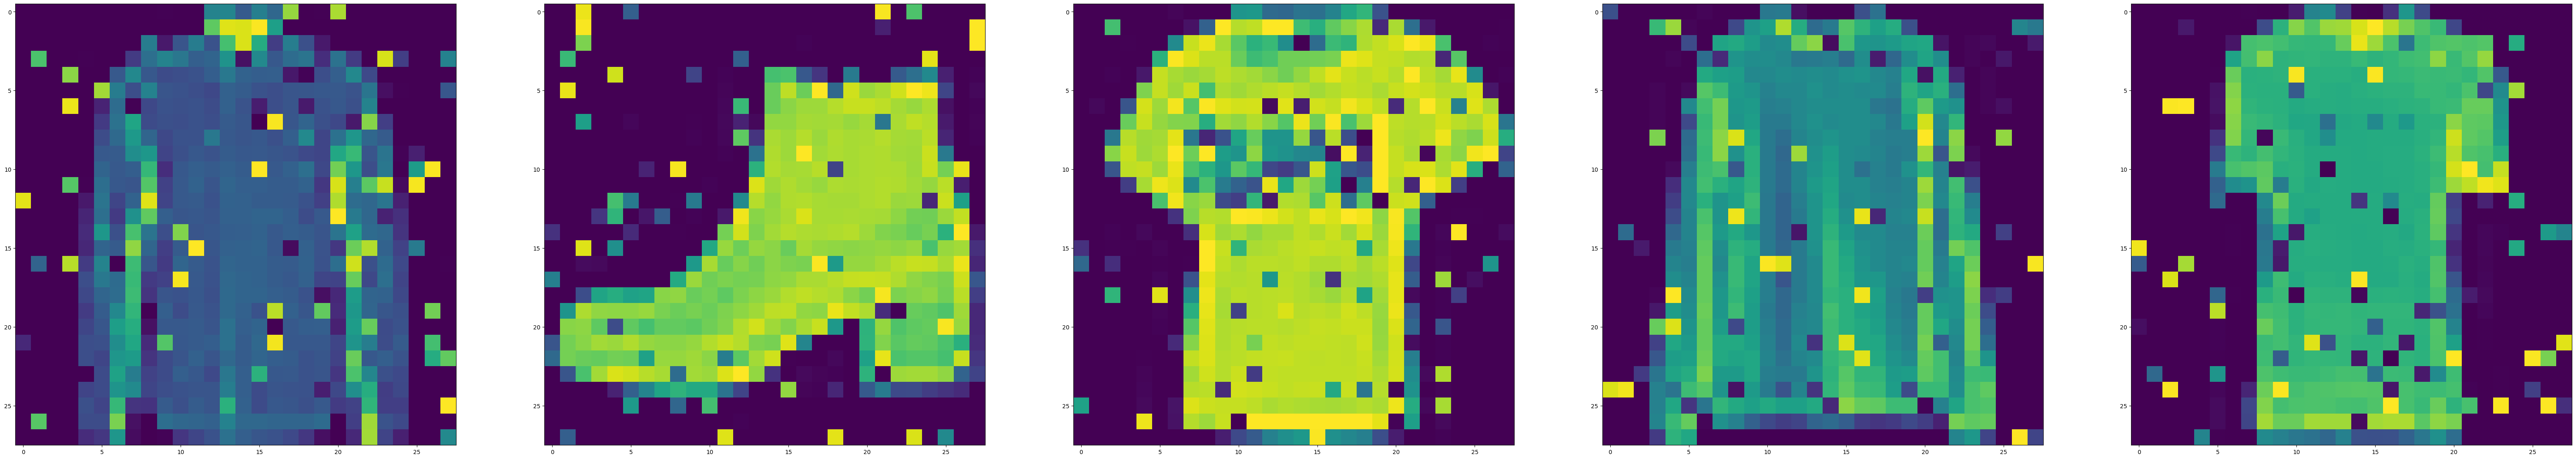

In [ ]:
##노이즈 생성 후
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

**오토인코더 모델 생성**

**Encoding Architecture**

인코딩 구조는 3개의 Convolutional Layer과 3개의

Max Pooling 레이어를 하나하나 쌓아 구성

Relu를 활성화함수로 사용하고, same 매개변수로 이미지 크기를 패딩을 통해 유지

**Max pooling layer**의 역할은 이미지 차원을 다운샘플링하기 위해 사용

이 레이어는 초기 표현의 겹치지 않는 부분 영역에 최대 필터를 적용

**Decoding Architecture**

디코딩 구조에서도 거의 유사하게 3개의 Convolutional Layer를 사용

하지만 Max Pooling layer 3개 대신에 unsampling layer 3개를 사용

활성화함수와 패딩은 인코딩과 동일


**Unsampling layer**의 역할은 입력 벡터를 더 높은 차원으로 업샘플링하기 위해 사용

Max pooling 연산은 비가역이지만, 각 풀링 영역 내에 최대 값의 위치를 기록함으로써 근사 역을 구할 수 있음

Umsampling 레이어는 이 속성을 사용하여 낮은 차원의 특징 공간에서 재구성합니다.

In [ ]:
# input layer 정의
input_layer = Input(shape=(28, 28, 1))
##입력 이미지의 크기는 28x28 픽셀이며, 채널(channel) 수는 1로 설정
##MNIST와 같은 흑백 이미지 데이터를 처리하기 위해 채널 수가 1로 설정

# 인코딩 아키텍처 (Encoding Architecture) 정의 ;컨볼루션 레이어와 Max Pooling 레이어로 구성
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPool2D( (2, 2), padding='same')(encoded_layer3)
##ReLU(활성화 함수)를 사용하여 비선형성을 도입하고, 컨볼루션 필터로 이미지의 특징을 추출

# 디코딩 아키텍처 (Decoding Architecture) 정의 ; 컨볼루션 레이어와 UpSampling 레이어로 구성
decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
output_layer   = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# 전체 오토인코더 모델을 생성
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624

조기 학습 종료로 훈련
(더 좋은 결과를 원한다면 epochs 수를 늘리면 됌)

 오토인코더 모델을 훈련하면서 검증 데이터의 손실을 모니터링하며, 손실이 개선되지 않으면 조기 종료하여 불필요한 훈련을 방지

In [ ]:
# EarlyStopping 콜백(callback)을 설정
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=5, mode='auto')
##모니터링할 지표로 검증 데이터의 손실을 사용
## 10 에포크 동안 개선되지 않을 경우 훈련이 중지
##중간 결과를 출력하는 방식을 설정합니다. 여기서는 5로 설정하여 중간 결과를 자세하게 출력
##최소화하려는 지표를 자동으로 결정

# 모델을 훈련하고 히스토리(학습 곡선) 정보를 저장
history = model_2.fit(train_x_n, train_x, epochs=20, batch_size=2048, validation_data=(val_x_n, val_x),
                      callbacks=[early_stopping])
##train_x_n은 노이즈가 추가된 훈련 데이터
## 20 에포크 동안 모델을 훈련하겠다는 것을 의미
##batch_sizesms 한 번의 반복(iteration)에서 처리되는 데이터의 미니배치 크기를 설정

Epoch 1/20
4/4 [==============================] - 30s 8s/step - loss: 0.1701 - val_loss: 0.1024
Epoch 2/20
4/4 [==============================] - 29s 7s/step - loss: 0.1066 - val_loss: 0.0935
Epoch 3/20
4/4 [==============================] - 36s 10s/step - loss: 0.0949 - val_loss: 0.0854
Epoch 4/20
4/4 [==============================] - 29s 7s/step - loss: 0.0780 - val_loss: 0.0739
Epoch 5/20
4/4 [==============================] - 29s 7s/step - loss: 0.0668 - val_loss: 0.0639
Epoch 6/20
4/4 [==============================] - 29s 7s/step - loss: 0.0583 - val_loss: 0.0558
Epoch 7/20
4/4 [==============================] - 30s 7s/step - loss: 0.0528 - val_loss: 0.0497
Epoch 8/20
4/4 [==============================] - 29s 7s/step - loss: 0.0481 - val_loss: 0.0448
Epoch 9/20
4/4 [==============================] - 29s 7s/step - loss: 0.0443 - val_loss: 0.0428
Epoch 10/20
4/4 [==============================] - 30s 7s/step - loss: 0.0419 - val_loss: 0.0410
Epoch 11/20
4/4 [=====================

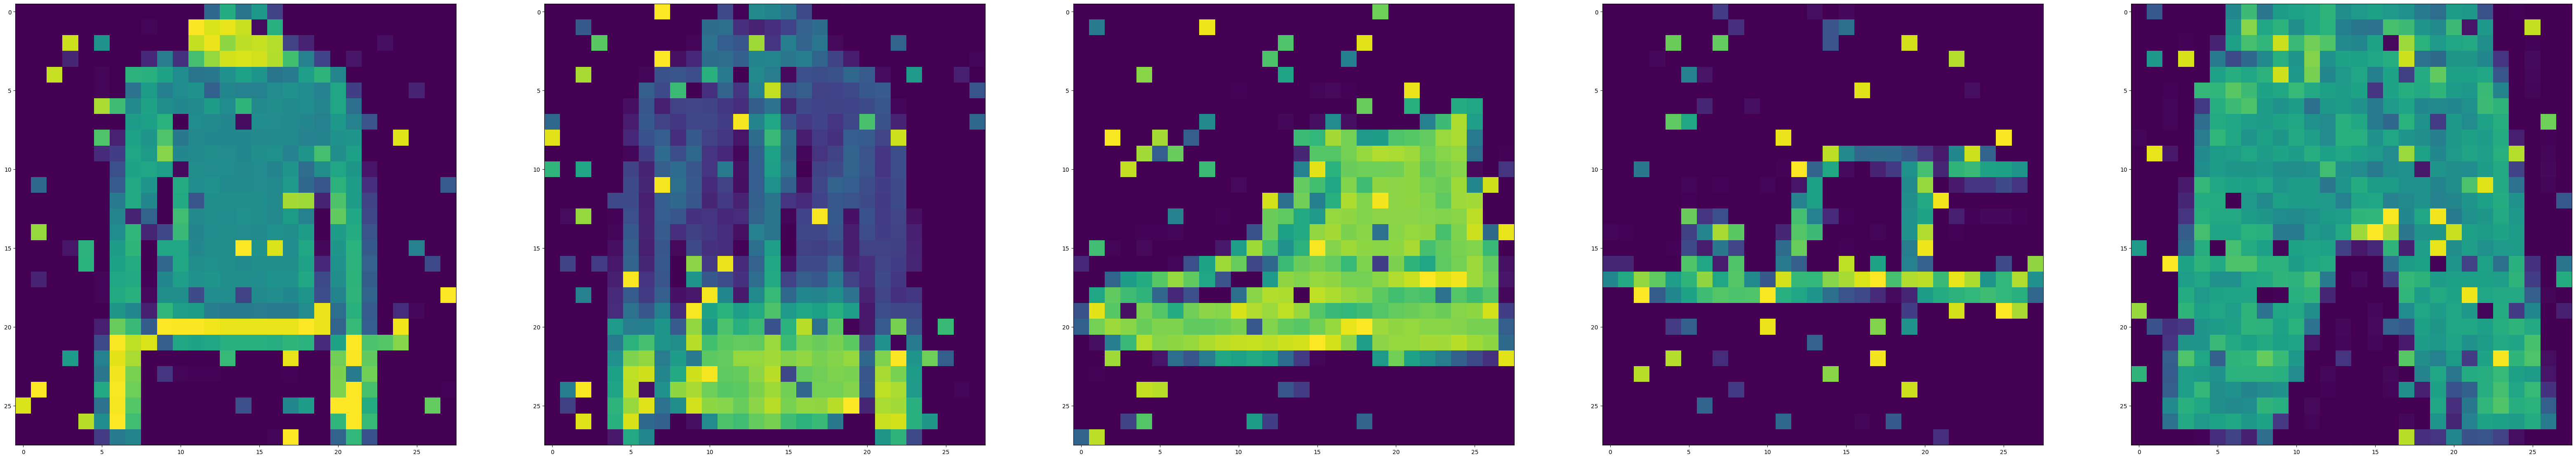

In [ ]:
##노이즈 적용된 검증 데이터

# 새로운 그림(플롯)을 생성하고 서브플롯을 설정
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)

# 5부터 9까지의 인덱스를 사용하여 이미지 표시 루프를 실행
for i in range(5, 10):
    # 각 서브플롯(ax[i-5])에 노이즈가 추가된 검증 데이터 이미지 표시
    ax[i-5].imshow(val_x_n[i].reshape(28, 28))

# 그림(플롯)을 표시
plt.show()

1/1 [==============================] - 0s 170ms/step


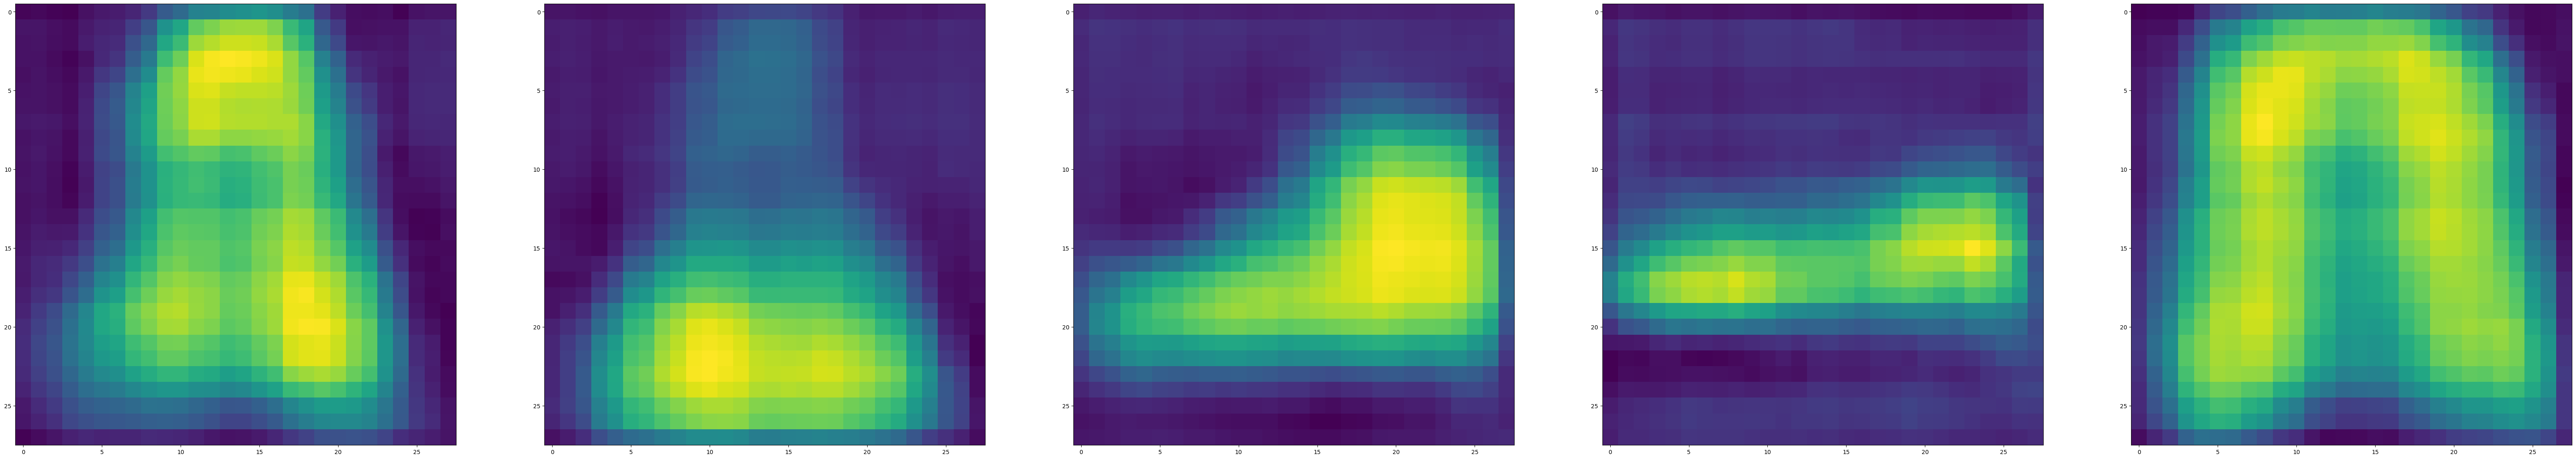

In [ ]:
##노이즈를 없앤 오토인코딩 후 검증 데이터

# 모델을 사용하여 노이즈를 없앤 검증 데이터 이미지(10개)를 재구성
preds = model_2.predict(val_x_n[:10])

# 새로운 그림(플롯)을 생성하고 서브플롯을 설정
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)

# 5부터 9까지의 인덱스를 사용하여 이미지 표시 루프를 실행
for i in range(5, 10):
    # 각 서브플롯(ax[i-5])에 재구성된 이미지 표시
    ax[i-5].imshow(preds[i].reshape(28, 28))

# 그림(플롯)을 표시
plt.show()

여기서는 적은 epoch로 시도했기에 비교적 불충분한 결과가 나올 수 있지만,

500~1000 epoch 정도로 시도하면 더 좋은 결과가 나올 것

# UseCase 3: Sequence to Sequence Prediction using AutoEncoders

sequence to sequence 예측 해보기

앞의 예시에서는 기본적으로 2차원 데이터였고, 이번에는 sequence 데이터는 1차원 데이터

시퀀스 데이터의 예시 : 시계열 데이터, 문자열 데이터

이미지에 CNN을 사용했다면, 이 케이스에서는 LSTM을 사용

**Autoencoder Architecture**

이 케이스의 오토인코더에서도 입력을 변환하는 인코더와 타겟으로 변환하는 디코더가 존재할 것입니다. 우선 LSTM이 이 구조에서 어떤식으로 작동하는지 알아봅시다.

Long Short-Term Memory, LSTM은 내부 루프로 구성된 반복적 신경망입니다.(RNN)
다른 RNN과 다르게 backpropagation throught time, BPTT를 활용하여 효과적으로 훈련하고, 사라지는 그래디언트 문제를 방지합니다.
LSTM layer에서 메모리 유닛을 정의할 수 있고, layer에 속하지 않은 각 유닛은 셀의 상태를 나타내는 c와 숨겨진 상태이자 출력인 h 등이 있습니다.
Keras를 사용하면, LSTM 레이어의 출력 상태와 LSTM 레이어의 현재 상태에 모두 접근 할 수 있습니다.

이제 학습과 생성을 하는 오토인코더 구조를 만들어봅시다. 2가지의 요소로 이루어집니다.

시퀀스를 입력으로 받아들이고 LSTM의 현재 상태를 출력으로 반환하는 인코더 아키텍처
시퀀스 및 인코더 LSTM 상태를 입력으로 받아 디코딩 된 출력 시퀀스를 반환하는 디코더 아키텍처
LSTM의 숨겨진 상태와 메모리 상태를 저장하고 (숨겨진 그리고 상태들을) 접근하므로,보이지 않는 데이터에 대한 예측을 생성하는 동안 LSTM을 사용할 수 있습니다.
우선, 고정 길이의 무작위 시퀀스를 포함하는 시퀀스 데이터 세트를 생성합니다. 우리는 무작위 순서를 생성하는 함수를 생성 할 것입니다.

X1은 난수를 포함하는 입력 시퀀스 의미합니다.
X2는 시퀀스의 다른 요소를 재생산하기 위해 시드로 사용되는 패딩 된 시퀀스를 의미합니다.
y는 대상 시퀀스 또는 실제 시퀀스를 나타냅니다.

In [ ]:
# 필요한 라이브러리 및 모듈을 import
from random import randint
from keras.utils import to_categorical
import numpy as np

# 데이터셋을 생성하는 함수 정의
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        ## 입력 시퀀스를 생성(랜덤 시퀀스)
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]

        ## 출력 시퀀스를 생성
        target = inp_seq[:n_out]

        ## create padded sequence / seed sequence
        target_seq = list(reversed(target)) ##출력 시퀀스를 뒤집어서 target_seq를 생성하고
        seed_seq = [0] + target_seq[:-1]  ##첫 번째 요소를 제외한 시퀀스를 생성

        # 범주형(categorical)으로 변환
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))

    # 생성된 리스트들을 넘파이 배열로 변환하고 불필요한 차원을 제거
    X1 = np.squeeze(np.array(X1), axis=1)
    X2 = np.squeeze(np.array(X2), axis=1)
    y  = np.squeeze(np.array(y), axis=1)
    return X1, X2, y

# 데이터셋 파라미터 설정: 생성할 데이터셋의 크기와 특성을 설정
samples = 100000
features = 51
inp_size = 6
out_size = 3

# 데이터셋 생성: 생성된 입력, 시드, 출력 데이터의 모양(shape)을 출력
inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)

# 생성된 데이터의 모양(shape) 출력
print("Shapes: ", inputs.shape, seeds.shape, outputs.shape)

# 첫 번째 categorically 인코딩된 입력 시퀀스 예시 출력
print ("Here is first categorically encoded input sequence looks like: ", )
inputs[0][0]

Shapes:  (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
Here is first categorically encoded input sequence looks like: 


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

이제 케라스에서 모델을 만들어봅시다.

In [ ]:
# 함수 정의: 입력 및 출력 시퀀스의 크기를 기반으로 LSTM 오토인코더 모델과 연관된 인코더, 디코더 모델을 정의
def define_models(n_input, n_output):
    ## 인코더 아키텍처 정의
    ## 입력: 시퀀스
    ## 출력: 인코더 상태
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    ## 인코더-디코더 아키텍처 정의
    ## 입력: 시드 시퀀스
    ## 출력: 디코더 상태, 디코딩된 출력
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

    ## 디코더 모델 정의
    ## 입력: 현재 상태 + 인코딩된 시퀀스
    ## 출력: 디코딩된 시퀀스
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

    return model, encoder_model, decoder_model

# define_models 함수를 사용하여 모델 초기화
autoencoder, encoder_model, decoder_model = define_models(features, features)


In [ ]:
##모델확인하기

encoder_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, 51)]        0         
                                                                 
 lstm (LSTM)                 [(None, 128),             92160     
                              (None, 128),                       
                              (None, 128)]                       
                                                                 
Total params: 92160 (360.00 KB)
Trainable params: 92160 (360.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
decoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, 51)]           0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 lstm_1 (LSTM)               [(None, None, 128),          92160     ['input_4[0][0]',             
                              (None, 128),                           'input_5[0][0]',       

In [ ]:
autoencoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, 51)]           0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, None, 51)]           0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 128),                92160     ['input_3[0][0]']             
                              (None, 128),                                                        
                              (None, 128)]                                                        
                                                                                            

이제 오토인코더 모델을 아담 옵티마이저와 Catgegorical Cross Entropy를 손실함수로 사용하여 훈련해봅시다.

In [ ]:
# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# 모델 학습
autoencoder.fit([inputs, seeds], outputs, epochs=1)

3125/3125 [==============================] - 45s 13ms/step - loss: 0.6631 - acc: 0.7907


이제 입력 시퀀스를 이용해 시퀀스를 예측하는 함수를 만들어봅시다

In [ ]:
# One-hot 인코딩된 시퀀스를 다시 원래 형식으로 변환하는 함수
def reverse_onehot(encoded_seq):
    return [np.argmax(vector) for vector in encoded_seq]

# 디코더를 사용하여 시퀀스를 예측하는 함수
def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)

    current_state = encoder.predict(sequence)  # 인코더로부터 초기 상태를 얻습니다.

    for t in range(out_size):
        # 디코더로 현재 시드 시퀀스 및 상태를 전달하여 예측을 얻습니다.
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])  # 디코딩된 출력을 저장합니다.
        current_state = [h, c]  # 다음 반복에서 사용할 상태를 업데이트합니다.
        target_seq = pred  # 다음 반복에서 입력으로 사용할 예측을 업데이트합니다.

    return np.array(output)  # 예측된 시퀀스를 반환합니다.

이제 예측을 만들어 봅시다.

In [ ]:
for k in range(5):
    # 입력, 시드, 출력 시퀀스를 생성합니다 (각각 길이 1의 시퀀스)
    X1, X2, y = dataset_preparation(inp_size, out_size, features, 1)

    # 인코더 모델과 디코더 모델을 사용하여 시드 시퀀스에 대한 예측을 생성합니다
    target = predict_sequence(encoder_model, decoder_model, X1)

    # 예측 결과를 출력합니다
    print('\nInput Sequence=%s Seed Sequence=%s, Predicted Sequence=%s'
          % (reverse_onehot(X1[0]), reverse_onehot(y[0]), reverse_onehot(target)))


1/1 [==============================] - 0s 22ms/step

Input Sequence=[32, 23, 9, 30, 49, 33] Seed Sequence=[9, 23, 32], Predicted Sequence=[9, 23, 32]
1/1 [==============================] - 0s 39ms/step

Input Sequence=[45, 50, 36, 19, 19, 11] Seed Sequence=[36, 50, 45], Predicted Sequence=[36, 50, 45]
1/1 [==============================] - 0s 35ms/step

Input Sequence=[2, 28, 14, 33, 23, 18] Seed Sequence=[14, 28, 2], Predicted Sequence=[14, 28, 2]
1/1 [==============================] - 0s 35ms/step

Input Sequence=[41, 42, 1, 47, 1, 7] Seed Sequence=[1, 42, 41], Predicted Sequence=[1, 42, 41]
1/1 [==============================] - 0s 36ms/step

Input Sequence=[48, 34, 24, 48, 41, 16] Seed Sequence=[24, 34, 48], Predicted Sequence=[24, 34, 48]
